In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_clf = SVC()

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_clf.predict(X_test)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy without PCA:", accuracy)


Accuracy without PCA: 0.9473684210526315


Text(0, 0.5, 'Feature 2')

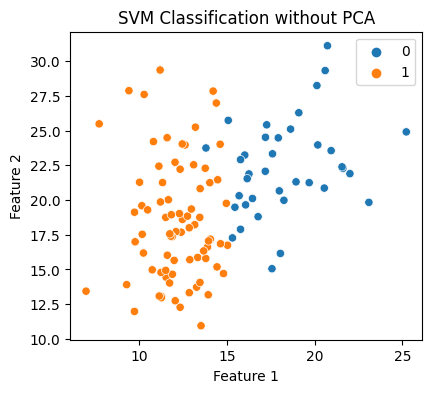

In [24]:
# Plot SVM classification without PCA
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.title("SVM Classification without PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier
svm_clf_pca = SVC()

# Fit the classifier to the PCA-transformed training data
svm_clf_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_pred_pca = svm_clf_pca.predict(X_test_pca)

# Calculate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy with PCA:", accuracy_pca)


Accuracy with PCA: 0.9649122807017544


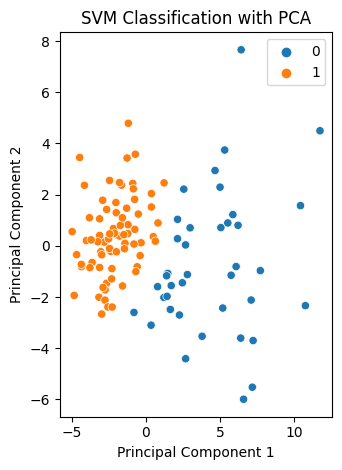

In [26]:
# Plot SVM classification with PCA
plt.subplot(122)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_pca)
plt.title("SVM Classification with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [27]:
# Calculate the difference in accuracies
accuracy_diff = accuracy_pca - accuracy

# Print the accuracies and the difference
print("Accuracy without PCA:", accuracy)
print("Accuracy with PCA:", accuracy_pca)
print("Difference in accuracy:", accuracy_diff)


Accuracy without PCA: 0.9473684210526315
Accuracy with PCA: 0.9649122807017544
Difference in accuracy: 0.01754385964912286
